In [1]:
# import the necessary packages
import numpy as np
import argparse
import cv2

In [2]:
# load the image and convert it to grayscale
image = cv2.imread('Bill.jpg')

In [3]:
#resize image
image = cv2.resize(image,None,fx=0.7, fy=0.7, interpolation = cv2.INTER_CUBIC)

In [4]:
#convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [5]:
#calculate x & y gradient
gradX = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = -1)
gradY = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = -1)

# subtract the y-gradient from the x-gradient
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)
cv2.resize(gradient,None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [6]:
# blur the image
blurred = cv2.blur(gradient, (3, 3))

In [7]:
(_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)

cv2.resize(thresh,None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

cv2.resize(closed,None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
# perform a series of erosions and dilations
closed = cv2.erode(closed, None, iterations = 4)
closed = cv2.dilate(closed, None, iterations = 4)

cv2.resize(closed,None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)
# find the contours in the thresholded image, then sort the contours
# by their area, keeping only the largest one
cnts,hierarchy = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2:]

c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
c1 = sorted(cnts, key = cv2.contourArea, reverse = True)[1]

In [10]:
# compute the rotated bounding box of the largest contour
rect = cv2.minAreaRect(c)
box = np.int0(cv2.boxPoints(rect))
rect1 = cv2.minAreaRect(c1)
box1 = np.int0(cv2.boxPoints(rect1))

# draw a bounding box arounded the detected barcode and display the image
cv2.drawContours(image, [box], -1, (0, 0, 255), 3)
cv2.drawContours(image, [box1], -1, (0, 0, 255), 3)

image = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)

/tmp/ipykernel_9700/2408981286.py:3: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(cv2.boxPoints(rect))
/tmp/ipykernel_9700/2408981286.py:5: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box1 = np.int0(cv2.boxPoints(rect1))


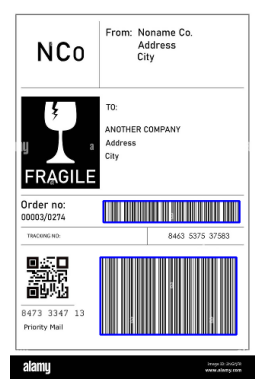

In [11]:
import matplotlib.pyplot as plt
# Plot the image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()